<a href="https://colab.research.google.com/github/deborahmasibo/Moringa-Core-Module-2-Week-3-IP/blob/main/Hypothyroidism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Hypothyroidism**

## 2. Data Understanding

In [163]:
# Imports
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from scipy.stats import bartlett
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
import os
# Using seaborn style defaults and setting the default figure size
sns.set(rc={'figure.figsize':(30, 5)})
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

In [4]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Accessing working directory
os.chdir('/content/drive/My Drive/Core/Machine Learning/Moringa Core Module 2 Week 3 IP')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### a) Reading the Data

In [42]:
# Dataset loading
thyroid = pd.read_csv('hypothyroid.csv', na_values = {'?'})

### b) Checking the Data

**Number of Records**

In [43]:
# Number of rows and columns
print(f'Records: {thyroid.shape[0]} and columns: {thyroid.shape[1]}')

Records: 3163 and columns: 26


**Top Dataset Preview**

In [44]:
# View all columns
pd.set_option('display.max_columns', None)

In [45]:
# First 5 records
thyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,NaN
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,NaN
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,NaN
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,NaN
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,NaN


**Bottom Dataset Preview**

In [15]:
# Last 5 records
thyroid.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


### c) Checking Datatypes

In [46]:
# Dataset infromation
thyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3163 non-null   object 
 1   age                        2717 non-null   float64
 2   sex                        3090 non-null   object 
 3   on_thyroxine               3163 non-null   object 
 4   query_on_thyroxine         3163 non-null   object 
 5   on_antithyroid_medication  3163 non-null   object 
 6   thyroid_surgery            3163 non-null   object 
 7   query_hypothyroid          3163 non-null   object 
 8   query_hyperthyroid         3163 non-null   object 
 9   pregnant                   3163 non-null   object 
 10  sick                       3163 non-null   object 
 11  tumor                      3163 non-null   object 
 12  lithium                    3163 non-null   object 
 13  goitre                     3163 non-null   objec

* The dataset has missing values.
* The age, TSH, T3 TT4, T4U and FTI columns need to be converted to numeric form.

## 3. External Dataset Validation 

## 4. Data Preperation

### a) Validation

In [20]:
# Checking columns
thyroid.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

All columns will be retained.

### b) Completeness

In [47]:
# Checking for missing values
thyroid.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [50]:
# Check percentage of missing values for each column
# List of columns with missin values
missing_cols = []
for i, col in enumerate(thyroid.columns):
  missing = (thyroid[col].isnull().sum()/thyroid.shape[0])*100
  if missing > 0:
    missing_cols.append(col)
  print(f'{i+1}. {col} = {(thyroid[col].isnull().sum()/thyroid.shape[0])*100}%')

1. status = 0.0%
2. age = 14.1005374644325%
3. sex = 2.3079355042681002%
4. on_thyroxine = 0.0%
5. query_on_thyroxine = 0.0%
6. on_antithyroid_medication = 0.0%
7. thyroid_surgery = 0.0%
8. query_hypothyroid = 0.0%
9. query_hyperthyroid = 0.0%
10. pregnant = 0.0%
11. sick = 0.0%
12. tumor = 0.0%
13. lithium = 0.0%
14. goitre = 0.0%
15. TSH_measured = 0.0%
16. TSH = 14.796079671198228%
17. T3_measured = 0.0%
18. T3 = 21.97281062282643%
19. TT4_measured = 0.0%
20. TT4 = 7.872273158393931%
21. T4U_measured = 0.0%
22. T4U = 7.840657603540942%
23. FTI_measured = 0.0%
24. FTI = 7.809042048687955%
25. TBG_measured = 0.0%
26. TBG = 91.77995573822321%


* The TBG column will be dropped as 92% of its records are missing.
* The rest will be imputed.

In [52]:
# Columns with mising values
missing_cols

['age', 'sex', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

In [53]:
# Dropping TBG
thyroid.drop('TBG', axis = 1, inplace = True)

In [54]:
# Unique sex column values
thyroid.sex.value_counts()

F    2182
M     908
Name: sex, dtype: int64

In [55]:
# Imputing with the mode which is female
thyroid.fillna('F', inplace = True)

In [56]:
# Removing columns that have been dealt with from the list of columns with 
# missing values.
missing_cols.remove('sex')
missing_cols.remove('TBG')

**Changing the datatypes first**

In [67]:
# Converting the numeric columns from object type to numeric datatypes.
for col in missing_cols:
  thyroid[col] = pd.to_numeric(thyroid[col],errors='coerce')
# Imputing the mean
for col in missing_cols:
  thyroid[col].fillna(thyroid[col].mean(), inplace = True)

In [68]:
# Checking changes
thyroid.isnull().any().any()

False

All missing values have been dealt with.

### c) Consistency

In [70]:
# Checking for duplicates
thyroid.duplicated().any().any()

True

In [71]:
# Dropping duplicates
thyroid.drop_duplicates(inplace= True)

In [72]:
# Checking changes
thyroid.duplicated().any().any()

False

Duplicates have been removed successfully.

### d) Uniformity

In [73]:
# Columns
thyroid.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured'],
      dtype='object')

In [74]:
# Changing all column names to lower case
thyroid.columns = thyroid.columns.str.lower()
# Checking changes
thyroid.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured'],
      dtype='object')

The column names have a consistent case.

### e) Outliers

In [36]:
# Outliers function
def outliers(data):
  # IQR
  Q1, Q3, IQR = 0, 0, 0
  outliers = pd.DataFrame()
  # Numerical columns
  numerical = data.select_dtypes(include = ['int64', 'float64'])
  Q1 = numerical.quantile(0.25)
  Q3 = numerical.quantile(0.75)
  IQR = Q3 - Q1
  # Outliers
  outliers = numerical[((numerical < (Q1 - 1.5 * IQR)) |(numerical > (Q3 + 1.5 * IQR))).any(axis=1)]
  print(f'Number of outliers = {outliers.shape[0]}')
  print(f'Percentage = {(outliers.shape[0]/data.shape[0])*100}%')

In [76]:
# Checking for outliers
# List of columns with continuous values
continuous = list(thyroid.select_dtypes(exclude = 'object'))
outliers(thyroid[continuous])

Number of outliers = 655
Percentage = 21.78250748254074%


The outliers form a significant part of the data. Standardization will be used to normalize the distribution of the data.

## 5. Desciptive analysis

### a) Univariate Analysis

### b) Bivariate Analysis

### c) Multivariate Analysis

Correlation Heatmap

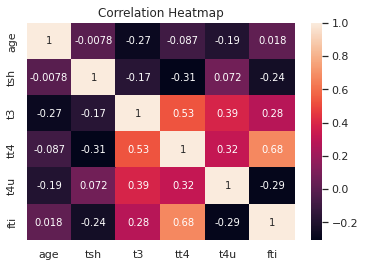

In [79]:
# Checking for high correlation between columns
sns.heatmap(thyroid.corr(), annot = True)
plt.title('Correlation Heatmap', y = 1.05);

* Only t3 -tt4 and tt4-fti have moderate correlation. They will be retained for the multicollinearity check. 
* They will also be retained as removal might lead to information loss. Feature importance will be done to determine their importance before removal.

**VIF**

In [80]:
# VIF function
def VIF(data):
  # Correlation matrix
  correlation = data.corr()
  # Inverse matrix
  inv_corr = pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)
  return inv_corr

In [81]:
VIF(thyroid)

,age,tsh,t3,tt4,t4u,fti
age,1.097133,0.019616,0.304391,-0.109919,0.129475,0.011686
tsh,0.019616,1.178581,0.108328,0.674416,-0.437904,-0.333707
t3,0.304391,0.108328,1.618303,-0.444210,-0.517200,-0.286716
tt4,-0.109919,0.674416,-0.444210,4.622389,-2.426450,-3.556390
t4u,0.129475,-0.437904,-0.517200,-2.426450,2.769128,2.497090
fti,0.011686,-0.333707,-0.286716,-3.556390,2.497090,4.144575


The VIFs are lower than 5, therefore, multicollinearity is within a manageable range.

**Linear Discriminant Analysis**

In [97]:
# Scaling function
def Standardization(X_train, X_test):
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  return X_train, X_test

In [82]:
# LDA function
def Lda(X_train, X_test, y_train, components = None):
  lda = LDA(n_components= components)
  X_train = lda.fit_transform(X_train, y_train)
  X_test = lda.transform(X_test)
  return X_train, X_test

*Encoding*

In [86]:
# List of categorical columns
categorical = list(thyroid.select_dtypes(include = 'object'))
# Remove label column 
categorical.remove('query_hypothyroid')

In [90]:
# Label encode label column
thyroid[['query_hypothyroid']] = thyroid[['query_hypothyroid']].apply(LabelEncoder().fit_transform)
# Checking changes
thyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured
0,hypothyroid,72.0,M,f,f,f,f,0,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n
1,hypothyroid,15.0,F,t,f,f,f,0,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n
2,hypothyroid,24.0,M,f,f,f,f,0,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n
3,hypothyroid,24.0,F,f,f,f,f,0,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n
4,hypothyroid,77.0,M,f,f,f,f,0,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n


In [92]:
# One-hot encoding columns
thyroid = pd.get_dummies(thyroid)
# Checking changes
thyroid.head()

,age,query_hypothyroid,tsh,t3,tt4,t4u,fti,status_hypothyroid,status_negative,sex_F,sex_M,on_thyroxine_f,on_thyroxine_t,query_on_thyroxine_f,query_on_thyroxine_t,on_antithyroid_medication_f,on_antithyroid_medication_t,thyroid_surgery_f,thyroid_surgery_t,query_hyperthyroid_f,query_hyperthyroid_t,pregnant_f,pregnant_t,sick_f,sick_t,tumor_f,tumor_t,lithium_f,lithium_t,goitre_f,goitre_t,tsh_measured_n,tsh_measured_y,t3_measured_n,t3_measured_y,tt4_measured_n,tt4_measured_y,t4u_measured_n,t4u_measured_y,fti_measured_n,fti_measured_y,tbg_measured_n,tbg_measured_y
0,72.0,0,30.0,0.6,15.0,1.48,10.0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
1,15.0,0,145.0,1.7,19.0,1.13,17.0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
2,24.0,0,0.0,0.2,4.0,1.00,0.0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
3,24.0,0,430.0,0.4,6.0,1.04,6.0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
4,77.0,0,7.3,1.2,57.0,1.28,44.0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0


In [96]:
# Features and label
Xch = thyroid.drop('query_hypothyroid', axis = 1).values
ych = thyroid.query_hypothyroid.values.reshape(-1, 1)
# Train-test-split
Xch_train, Xch_test, ych_train, ych_test = train_test_split(Xch, ych, test_size = 0.2, random_state = 0)

In [100]:
# Standardization
Xch_train, Xch_test = Standardization(Xch_train, Xch_test)

The sets above will be used to challenge the solution in the modelling section when LDA will be performed.

## 6. Modelling

In [112]:
# Features and label
X = thyroid.drop('query_hypothyroid', axis = 1)
y = thyroid.query_hypothyroid
# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Part 1. Decision Trees

#### a) RandomForestClassifier

**Function Definition**

In [157]:
#  Classification Model
def RF_Classifier(X_train, X_test, y_train, y_test, n = 100,
                  depth= None, split = 2):
  # Changing test-train sets to numpy arrays
  X_train = X_train.values
  X_test = X_test.values
  y_train = y_train.values.reshape(-1, 1)
  y_test = y_test.values.reshape(-1, 1)
  # Standardization
  X_train, X_test = Standardization(X_train, X_test)
  # Classifier
  tree = RandomForestClassifier(n_estimators = n, random_state=0,
                                min_samples_split = split, max_depth= depth)
  # Train it on our training set.
  tree.fit(X_train, y_train)
  # Prediction
  y_pred = tree.predict(X_test)
  # Metrics
  # Classification report
  report = classification_report(y_test, y_pred)
  print(f'Classification Report')
  print(f'{"-"*70}\n')
  print(f'{report}')
  # df
  comparison_frame = pd.DataFrame({'Actual': y_test.flatten(),
                                   'Predicted': y_pred.flatten()})
  print('\nPredictions')
  print(f'{"-"*70}\n')
  print(comparison_frame.head(), '\n')

In [166]:
def Importances_Class(X_train, X_test, y_train, y_test, f, n = 100,
                      depth= None, split = 2):
  # Classifier
  tree = RandomForestClassifier(n_estimators = n, random_state=0,
                                min_samples_split = split, max_depth= depth)
  # Train it on our training set.
  tree.fit(X_train, y_train)
  # Prediction
  y_pred = tree.predict(X_test)  
  # Importances
  importances = list(tree.feature_importances_)
  # Features
  feat = []
  imp = []
  # Dataframe
  df = pd.DataFrame()
  for feature, importance in zip(f, importances):
    feat.append(feature)
    imp.append(importance)
  df['features'] = feat
  df['importance'] = imp
  df.sort_values('importance', ascending = False, inplace = True)

  # Bar chart
  values = list(range(len(imp)))
  fig, ax = plt.subplots(figsize = (15, 5))
  plt.bar(feat, imp)
  # Tick labels for x axis
  plt.xticks(values, f, rotation='vertical')
  # Axis labels and title
  plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [110]:
# Visualization
def Visualize_Class(X_train, X_test, y_train, y_test, f, png_name, depth = None, split = 2, n = 100):
  # Classifier
  forest = RandomForestClassifier(n_estimators = n, random_state=0, min_samples_split = split, max_depth= depth)
  # Train it on our training set.
  forest.fit(X_train, y_train)
  # Prediction
  y_pred = forest.predict(X_test)
  tree = forest.estimators_[50]
  # In memory file-like object
  dot_data = StringIO()
  # Export a decision tree in DOT format
  # This function generates a GraphViz representation of the decision tree,
  # which is then written into out_file.
  export_graphviz(tree, out_file = dot_data, filled = True, special_characters = True,
                  feature_names = f, rounded = True)
  #  This function returns the entire content of the file.
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
  # Convert decision tree to image 
  graph.write_png(png_name)
  return Image(graph.create_png())

**Feature Importance**

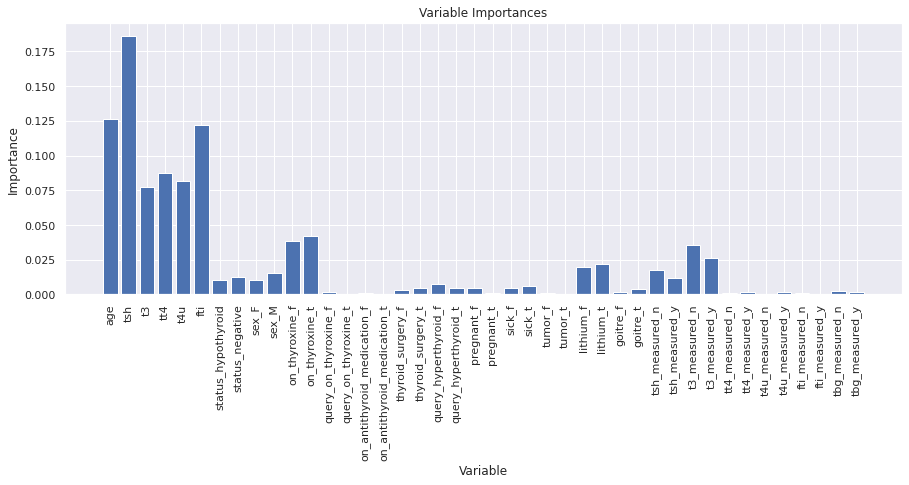

In [167]:
# Important Features
f = X.columns.tolist()
Importances_Class(X_train, X_test, y_train, y_test, f, n = 100,
                      depth= 5, split = 2)

Features with the higest importance are the age, tsh, t3, tt4, t4u and fti.

**Model Fitting and Predictions**

In [124]:
# Feature sets to be tried
set1 = ['age', 'tsh', 't3', 't4u', 'fti']
set2 = ['age', 'tsh', 't3', 't4u', 'fti', 'on_thyroxine_f', 'on_thyroxine_t']
set3 = ['age', 'tsh', 't3', 't4u', 'fti', 'on_thyroxine_f', 'on_thyroxine_t',
        't3_measured_n', 't3_measured_y']

In [142]:
# With all features
estimators = 100
depth = 5
split = 2
RF_Classifier(X_train, X_test, y_train, y_test, estimators,
                  depth, split)

Classification Report
----------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       552
           1       0.00      0.00      0.00        50

    accuracy                           0.92       602
   macro avg       0.46      0.50      0.48       602
weighted avg       0.84      0.92      0.88       602


Predictions
----------------------------------------------------------------------

   Actual  Predicted
0       0          0
1       0          0
2       0          0
3       0          0
4       0          0 



In [143]:
thyroid.columns

Index(['age', 'query_hypothyroid', 'tsh', 't3', 'tt4', 't4u', 'fti',
       'status_hypothyroid', 'status_negative', 'sex_F', 'sex_M',
       'on_thyroxine_f', 'on_thyroxine_t', 'query_on_thyroxine_f',
       'query_on_thyroxine_t', 'on_antithyroid_medication_f',
       'on_antithyroid_medication_t', 'thyroid_surgery_f', 'thyroid_surgery_t',
       'query_hyperthyroid_f', 'query_hyperthyroid_t', 'pregnant_f',
       'pregnant_t', 'sick_f', 'sick_t', 'tumor_f', 'tumor_t', 'lithium_f',
       'lithium_t', 'goitre_f', 'goitre_t', 'tsh_measured_n', 'tsh_measured_y',
       't3_measured_n', 't3_measured_y', 'tt4_measured_n', 'tt4_measured_y',
       't4u_measured_n', 't4u_measured_y', 'fti_measured_n', 'fti_measured_y',
       'tbg_measured_n', 'tbg_measured_y'],
      dtype='object')

In [158]:
# For the first set
X1 = thyroid[set1]
# Train and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size = 0.2, random_state = 0)
# Classification
estimators = 100
depth = 5
split = 2
RF_Classifier(X1_train, X1_test, y1_train, y1_test, estimators,
                  depth, split)

Classification Report
----------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       552
           1       1.00      0.02      0.04        50

    accuracy                           0.92       602
   macro avg       0.96      0.51      0.50       602
weighted avg       0.93      0.92      0.88       602


Predictions
----------------------------------------------------------------------

   Actual  Predicted
0       0          0
1       0          0
2       0          0
3       0          0
4       0          0 



In [149]:
# For the second set
X2 = thyroid[set2]
# Train and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X1, y, test_size = 0.2, random_state = 0)
# Classification
estimators = 100
depth = 5
split = 2
RF_Classifier(X2_train, X2_test, y2_train, y2_test, estimators,
                  depth, split)

Classification Report
----------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       552
           1       1.00      0.02      0.04        50

    accuracy                           0.92       602
   macro avg       0.96      0.51      0.50       602
weighted avg       0.93      0.92      0.88       602


Predictions
----------------------------------------------------------------------

   Actual  Predicted
0       0          0
1       0          0
2       0          0
3       0          0
4       0          0 



In [150]:
# For the third set
X3 = thyroid[set3]
# Train and test sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size = 0.2, random_state = 0)
# Classification
estimators = 100
depth = 5
split = 2
RF_Classifier(X3_train, X3_test, y3_train, y3_test, estimators,
                  depth, split)

Classification Report
----------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       552
           1       1.00      0.02      0.04        50

    accuracy                           0.92       602
   macro avg       0.96      0.51      0.50       602
weighted avg       0.93      0.92      0.88       602


Predictions
----------------------------------------------------------------------

   Actual  Predicted
0       0          0
1       0          0
2       0          0
3       0          0
4       0          0 



* From the classification report, it can be seen that there is al large class imbalance favouring a lack of having hypothyroidism.
* Varying the list of features based on importance does not affect the model's performace. Therefore, the first set with the most important features will be used to reduce model complexity.
* Achieving accuracy of 92% is great, however, needs further improvement without overfitting as the medical field required very accurate predictions.

**Visualization**

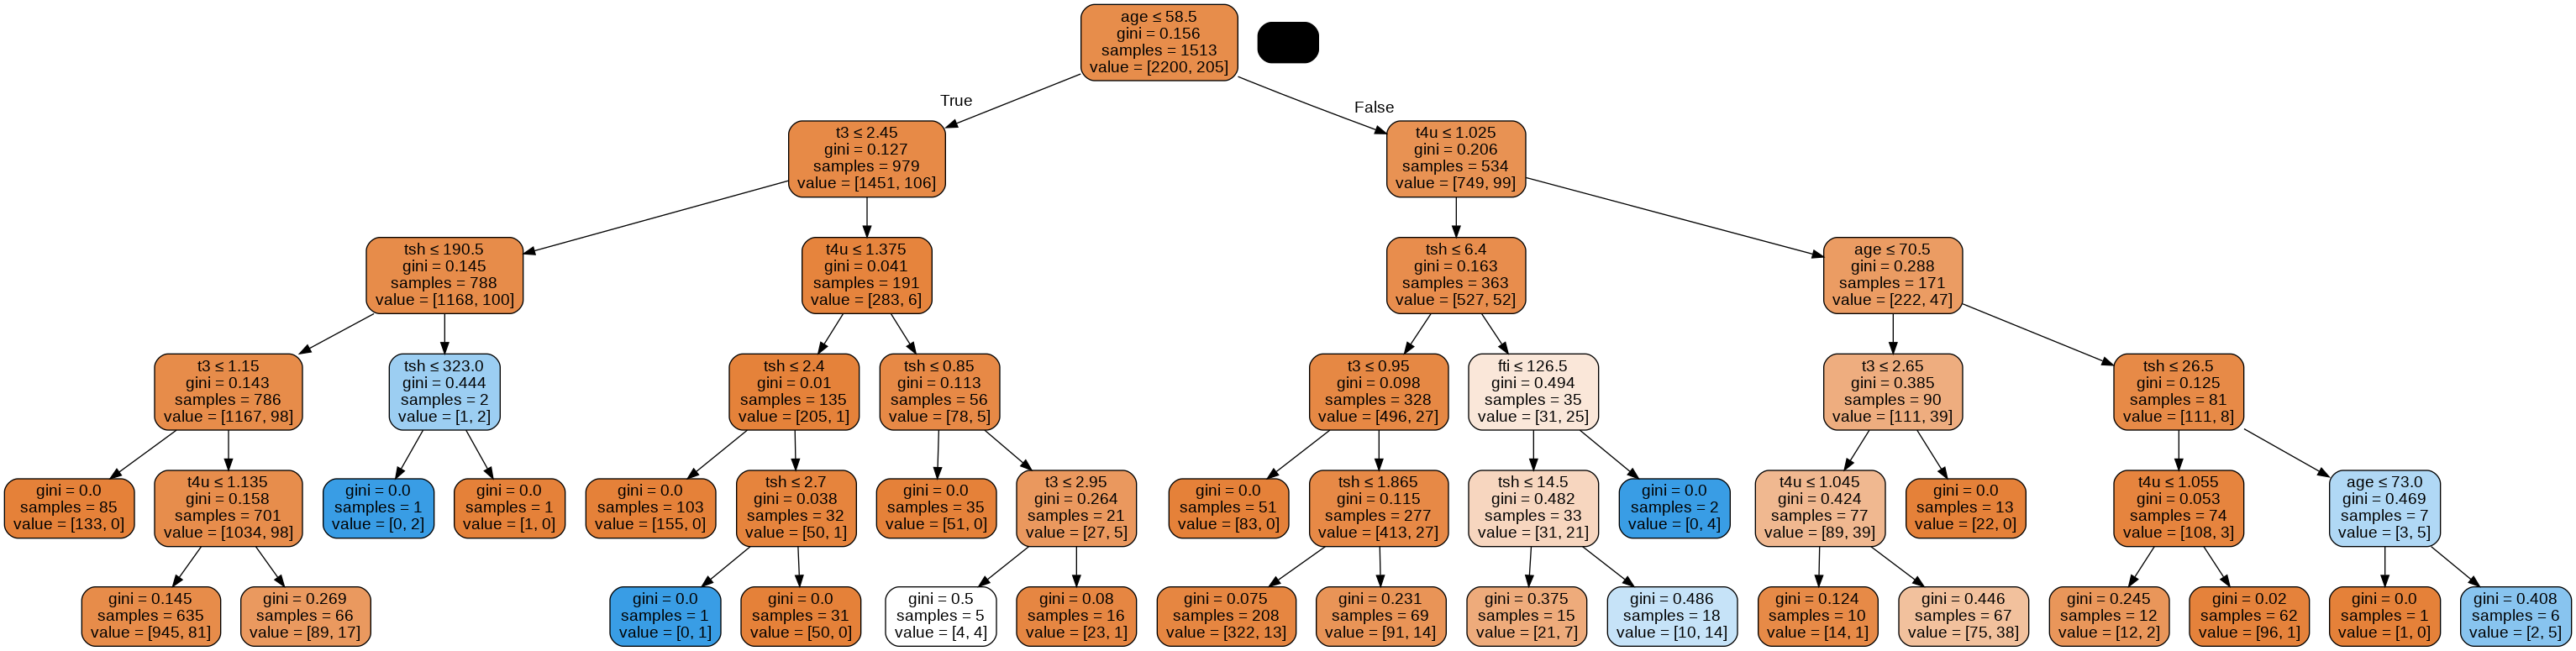

In [153]:
# Visualization
f = X1.columns.tolist()
Visualize_Class(X1_train, X1_test, y1_train, y1_test, f, 'Thyroidism', depth = 5,
                split = 2, n = 100)

All selected columns have been used in the classification process, therefore, it seems that the model is not overfitting on one or a few features.

**Hyperparameter Tuning**

In [159]:
# Random forest regressor without LDA
def RSearch(X, y, params, folds):

  # Scaling
  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  # Classifier
  model = RandomForestClassifier()
  rs_model = RandomizedSearchCV(estimator = model,
                            param_distributions= params,
                            n_iter=100,
                            cv= folds,
                            verbose= 1)
  # Model training
  rs_model.fit(X, y)
  # Best parameters
  print(f'Best parameters: {rs_model.best_params_}')
  # Best scores
  print(f'Best scores: {rs_model.best_score_}')

In [160]:
# Hyperparameter tuning using Randomized Search
# Hyperparameters to be tested
rf_params = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

In [ ]:
# Hyperparameter Tuning
RSearch(X1, y, rf_params, 10)

#### b) Gradient Boosting

**Functions Definition**

In [164]:
# GradientBoostingClassifier
# n =300
# lrate = 0.1
def GradientBClass(X_train, X_test, y_train, y_test, n, lrate, depth = None, split = 2):
  # Scaling
  X_train, X_test = Standardization(X_train, X_test)

  # Gradient Boosting
  gb = GradientBoostingClassifier(n_estimators= n, learning_rate= lrate, max_depth= depth)

  # Prediction
  gb= gb.fit(X_train, y_train)
  y_pred_gb = gb.predict(X_test)
  # Score
  score = gb.score(X_test, y_pred_gb)
  print(f'Score Ada: {score}')

  # Classification Report
  report = classification_report(y_test, y_pred_gb)
  print('Classification Report\n')
  print(f'{"-"*70}')
  print(report)

In [168]:
# Feature importances
def Importances_Class(X_train, X_test, y_train, y_test, f, n, lrate = 0.1,  depth= None, split = 2):
  # Scaling
  X_train, X_test = Standardization(X_train, X_test)

  # Gradient Boost
  gb = GradientBoostingClassifier(n_estimators= n, learning_rate= lrate, max_depth= depth)

  # Prediction
  gb= gb.fit(X_train, y_train)
  y_pred_gb = gb.predict(X_test)  

  # Importances
  importances = list(gb.feature_importances_)

  # Features
  feat = []
  imp = []

  # Dataframe
  df = pd.DataFrame()
  for feature, importance in zip(f, importances):
    feat.append(feature)
    imp.append(importance)
  df['features'] = feat
  df['importance'] = imp
  df.sort_values('importance', ascending = False, inplace = True)

  # Bar chart
  values = list(range(len(imp)))
  fig, ax = plt.subplots(figsize = (15, 5))
  plt.bar(feat, imp, orientation = 'vertical')
  # Tick labels for x axis
  plt.xticks(values, f, rotation='vertical')
  # Axis labels and title
  plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

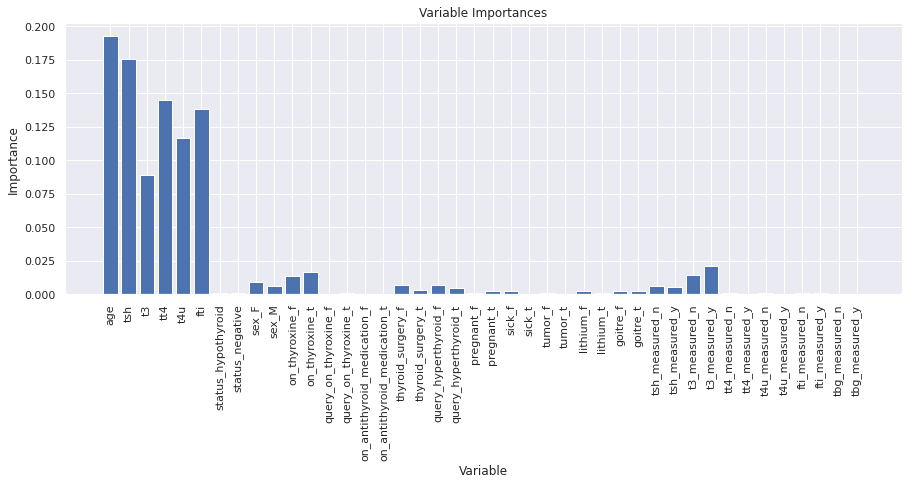

In [170]:
# Gradient Bppsting Feature Importance
n = 300
lrate = 0.1
depth = 5
split = 2
f = X.columns.tolist()
Importances_Class(X_train, X_test, y_train, y_test, f, n, lrate,  depth, split)

* The first six features have the highest importance. Furthermore, they are similar to that of RandomForestClassifier. The only difference is that the weights of the remaining columns are smaller.
* Therefore, these features will form the training set.

### Part 2. SVM